# Reddit Data Science Project: Comparing Subreddit Similarity

By David Chen (dchen) and Mayank Mali (mmali)

## Table of Contents:
1. [Background](#background)
2. [Problem](#problem)
3. [Related Work](#related-work)
4. [Data collection](#data-collection)
6. [Classification (Problem 1)](#classification)
7. [Visualization (Problem 2)](#visualization)
8. [Clustering (Problem 3)](#clustering)
    - [k-means clustering](#k-means)
    - [Hierarchical clustering](#hierarchical)
9. [Text Generation with n-gram](#n-gram)
11. [Conclusion](#conclusion)
10. [Future Investigation](#future)

<a id='background'></a>
# Background:
Reddit is a social media platform based on discussion around various topics. Users can post to Reddit, with a post title, body text, links, etc. Other users can then comment on the post and reply to other comments as a form of discussion. Users can then upvote or downvote posts and comments in order to influence visibility.

### Subreddits:
Given that there is a diverse range of interests and thus possible posts, Reddit is divided into distinct communities called subreddits. Users' posts are restricted to one subreddit at a time, and each subreddit has their own list of rules for submission. These subreddits are created and organized by topic, and each one has a distinct name reflecting that topic.
> For example, /r/dating_advice is a subreddit where users ask and give advice on the dating scene.

![](https://i.imgur.com/TLEcwhO.png)

### Posts:
A subreddit can have many thousands of posts. A reddit post (also called a "submission") in any given subreddit has a title, upvote score (number of upvotes minus number of downvotes), body text, and a forest of comments. In the backend, it also has a unique submission ID.

![](https://i.imgur.com/DyufEdT.png)

<a id='problem'></a>
# Problem:
This project is structured in a way such that we first attempt to answer a very basic problem, then build off of that problem to more complex problems.

### Problem 1:
The basic problem is: __"Given a post that came from one of two subreddits, is it possible to determine which subreddit it came from based only on text content?"__

For some subreddits, such as /r/dating_advice and /r/techsupport, this task seems very simple. Any human with cultural knowledge of the topics of each subreddit should be able to classify the post. However for others, such as /r/relationships and /r/relationship_advice, even a human may have trouble differentiating posts from those two subreddits.

Additionally, we restrict our input by removing all words that appear in the subreddit title. We do this to prevent "leaking" classification information to uncover more meaningful information with regards to the text content. This avoids the situation where classification of a post boils down to discovering the subreddit title within the post.

### Problem 2:
A follow-up question is: __"Given two subreddits, what words exactly differentiate their post content?"__

Once we know we can (or cannot) classify posts, we can try to examine those words that differentiate posts with respect to some trained classifier model. This provides useful insight into the tendencies of two subreddits, and in the case of two very similar subreddits, we can also determine subtle differences in the topics.

### Problem 3:
Another follow-up question is: __"Given a list of subreddits, can we cluster them by similarity?"__

Once we know we can classify posts from two subreddits, we can try to get a measure of similarity from the results. With that measure of similarity between every subreddit in our list, we can then attempt to cluster them.

### Side-Problem:
A fun side-problem is: __"With a subreddit's n-gram data, can we generate text that appears to be from that subreddit?"__

This is just for fun, not necessarily related too much to the problems above.

<a id='related-work'></a>
# Related work:
In the blog post "Classifying Reddit Posts With Natural Language Processing and Machine Learning" [[1]](#references), author Britt Allen applies supervised machine learning techniques in order to classify posts from /r/menstruation and /r/BabyBumps into the correct subreddit.

Our work would expand on this by not only comparing more than two subreddits, but also visualizing the learned parameters in a way that reveals the most significant differences. In addition, we will be utilizing TFIDF features (term frequency - inverse document frequency) instead of bag-of-words features.

In the website "Interactive map of reddit and subreddit similarity calculator" [[2]](#references), the author provides an interactive map of over 40k clustered subreddits. His methods looked at user comment history, and converted user subreddit overlap into a positive pointwise mutual information (PPMI) matrix. He then clustered subreddits using t-Distributed Stochastic Neighbor Embedding (t-SNE). Similarity was scored with cosine similarity.

Our work doesn't focus on user comment overlap, but solely on post title and body text. We attempt to cluster based on our classification results, and we use k-means and hierarchical clustering. Our work is parallel, but with different methods and different implications. While the website doesn't consider content, ours is based fully on text content.

<a id='data-collection'></a>
# Data collection:
For a given subreddit, our data consists of top and hot posts. Top posts are the most upvoted posts of all time, and "hot" posts are recent posts as designated by reddit's own popularity algorithm.

For a given post, we are interested in the body text and title text.

We collected the initial data using the PRAW API, which accesses reddit through a reddit account. The PRAW API has an intuitive flow, where one can get a `Subreddit` object, then its `Submission`s.

After putting all of the data in a Pandas DataFrame, we save it to file using pickle to avoid having to redownload everything.


In [1]:
# Imports

!pip install -q praw
!pip install wordcloud
import praw
import nltk
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import tqdm
import random
from wordcloud import WordCloud, STOPWORDS
import os.path

nltk.download('vader_lexicon')

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\Mayank\Anaconda3\envs\ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "C:\Users\Mayank\Anaconda3\envs\ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Mayank\Anaconda3\envs\ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\Mayank\Anaconda3\envs\ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Mayank\A

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\Mayank\Anaconda3\envs\ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "C:\Users\Mayank\Anaconda3\envs\ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Mayank\Anaconda3\envs\ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\Mayank\Anaconda3\envs\ml\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Mayank\A

True

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy import stats

## Authentication for PRAW API:
This code section has been deleted to avoid revealing our secret key.

In [4]:
# removed for publishing

## List of Subreddits:
All in all, 33 different subreddits. All of them were hand-picked, with the only criteria being that the majority of the posts had to have substantial text in the title or body. After initial selection, subreddits with similar topics were also added.

In [5]:
subreddit_names = ["tryndameremains", "needafriend", "financialplanning", "personalfinance", 
                   "techsupport", "amitheasshole", "asianbeautyexchange", "askscience", 
                   "explainlikeimfive", "cmu", "crazyhand", "dating_advice", "relationships", 
                   "justnomil", "talesfromtechsupport", "relationship_advice", "flute", 
                   "howdidtheycodeit", "iama", "talesfromretail", "karthusmains", "korean", 
                   "maliciouscompliance", "pettyrevenge", "legaladvice", "idontworkherelady", 
                   "prorevenge", "science", "singing", "stopgaming", "summonerschool", "tifu", 
                   "nosleep"]

test_small = ["tifu", "nosleep", "flute"]

## List of Stopwords:
Here, we remove words that exist in the subreddit names, in addition to other non-words and other manually selected stopwords.

In [6]:
# Subreddit Name Words
subreddit_words = ["tryndameremains", "tryndamere", "tryn", "trynd", "trynda", "needafriend", "friend", "friends", "financialplanning", "financial", 
                   "finance", "planning", "personalfinance", "personal", "techsupport", "tech", "support", 
                   "amitheasshole", "aita", "asshole", "asianbeautyexchange", "askscience", "explainlikeimfive", 
                   "eli5", "cmu", "crazyhand", "smash", "dating", "date", "dates", "advice", "datingadvice", 
                   "flute", "flutes", "piccolo", "dizi", "howdidtheycodeit", "code", "iama", "ama", "insaneparents", 
                   "karthusmains", "karthus", "mains", "korean", "maliciouscompliance", "malicious", "compliance", 
                   "pettyrevenge", "petty", "prorevenge", "pro", "revenge", "science", "singing", "sing", "voice", 
                   "vocal", "stopgaming", "gaming", "games", "game", "video", "twosentencehorror", "two", "sentence", 
                   "horror", "talesfromtechsupport", "tech", "support", "techsupport", "talesfromretail", "retail", 
                   "store", "idontworkherelady", "lady", "relationships", "relationship", "advice", "singer", 
                   "tifu", "legaladvice", "legal", "lawyer", "nosleep", "justnomil", "mother", "summoner", "school", 
                   "league", "legends", "leagueoflegends", "relationship_advice", "dating_advice"]

# STOPWORDS
custom_stop_words = ["ok", "original", "wibta", "dh", "oh", "fil", "ive", "dd", "imgur", "know", "sex", "want", "say", "mil", "edit", "www", "com", "don", "isn", "didn", "ve", "https", "http", "x200b", "utm_source", "link", "like", "make", "just", "way", "tl", "tldr", "dr", "reddit","comments", "gold", "post"]
stop_words = text.ENGLISH_STOP_WORDS.union(subreddit_words + custom_stop_words)

## Downloading Submission Data from Internet:
Functions that access the PRAW API and return a Pandas DataFrame with all of our relevant data.

In [7]:
def get_submissions(subreddit_name: str, limit: int, type: str) -> pd.DataFrame:
    '''
    actually downloads submissions from a subreddit, NO CACHING

    parameters:
    subreddit: str - the name of the subreddit
    limit: int - the number of submissions to store
    type: str - hot/top/new... etc
    returns:
    pd.DataFrame - that has columns:
      where 
        "submission_id" is the primary index AND the rest of the columns are:
        "subreddit", "title", "body", "created_utc", "gilded"
    '''
    # _replace_more_limit = 1

    subreddit = reddit.subreddit(subreddit_name)
    df = pd.DataFrame(columns=["submission_id", 
                             "subreddit", "title", "body", "created_utc", "gilded"])
    df.set_index("submission_id", inplace=True)

    if type == "hot":
        entries = subreddit.hot
    elif type == "top":
        entries = subreddit.top

    for submission in tqdm.tqdm_notebook(entries(limit=limit)):

        df.loc[submission.id, ["subreddit", "title", "body", "created_utc", "gilded"]] = (
            subreddit_name,
            submission.title,
            submission.selftext,
            pd.to_datetime(submission.created_utc, unit='s'),
            1 if submission.gilded > 0 else 0)

    return df

def download_data(subreddits):
    '''actually downloads 800 top and hot submissions from each subreddit, NO CACHING'''
    
    df = pd.DataFrame(columns=["submission_id", "subreddit", "title", "body", "created_utc", "gilded"])
    for sub in tqdm.tqdm_notebook(subreddits):
        df_sub_top = get_submissions(sub, 800, "top")
        df_sub_hot = get_submissions(sub, 800, "hot")
        df_sub = pd.concat([df_sub_top, df_sub_hot])
        df = pd.concat([df,df_sub])
    return df.drop_duplicates()

## Caching Submission data by Saving to/Reading from File

In [8]:
def save_to_file(dataframe, path="subreddit_data"):
    '''save a pandas dataframe to a pickle file using gzip compression'''
    
    dataframe.to_pickle(path, "gzip")
    
def read_from_file(path):
    '''Returns a pandas dataframe from the pickle file'''
    
    return pd.read_pickle(path, "gzip")

def get_subreddit_data():
    '''gets subreddit pandas dataframe from pickle file, 
    if it exists, else download data and create file
    (get subreddit data with file caching)'''
    
    path = "subreddit_data"
    if not os.path.exists(path):
        save_to_file(download_data(subreddits), path)
        
    return read_from_file(path)

In [9]:
df_loaded = get_subreddit_data()
df_loaded.head()

,subreddit,title,body,created_utc,gilded
submission_id,,,,,
cdrb78,tryndameremains,Complete Updated Matchup Guide for Top Lane Tr...,Link to the spreadsheet: https://docs.google.c...,2019-07-16 02:47:35,0
awtc3j,tryndameremains,Lul,,2019-03-03 11:51:31,0
bofmt5,tryndameremains,Do you guys find this relatable aswell?,,2019-05-14 07:23:32,0
cjs537,tryndameremains,This nice player friended me after a match and...,,2019-07-30 13:58:56,0
djxphp,tryndameremains,Gold players be like,,2019-10-19 02:21:44,0


<a id='classification'></a>
# Classification

For classification, we focus two subreddits at a time. For purposes of analysis and the rest of the project, we focus on Logistic Regression. But we also include implementation for Complement Naive Bayes and K-Nearest Neighbors out of curiousity and to support the validity of Logistic Regression.

To convert text data into a features usable by our models, we converted our examples into a TFIDF matrix.

In [10]:
def run_classification(model_type, X_train, y_train, X_test, y_test):
    '''trains a classification model and returns best estimator for given data'''
    
    # Ability to choose different models, log, nb, or knn
    if model_type == "log":
        params = {'penalty': ['l2'], 'C': [1., 1.5, 2., 2.5], 'solver': ['liblinear', 'lbfgs']}
        estimator = LogisticRegression()
    elif model_type == "nb":
        params = {'fit_prior': [True, False], 'alpha': [0.1, 0.5, 1.]}
        estimator = ComplementNB()
    elif model_type == "knn":
        params = {'n_neighbors': [3,5,10], 'p': [1,2], 'weights': ['uniform', 'distance']}
        estimator = KNeighborsClassifier()
    else:
        assert False, "not a valid model type"

    # Grid Search for best parameters
    model = GridSearchCV(estimator, params, cv=5, n_jobs=-1)

    model.fit(X_train, y_train)

    print(f'Train score = {model.score(X_train, y_train)}')
    print(f'Test score = {model.score(X_test, y_test)}')
    print(f'Best params = {model.best_params_}')
    return model.best_estimator_

## Examples/Benchmarks for Classification

To see if our methods work as expected, we test on four distinct pairs of subreddits.

- __/r/ProRevenge and /r/pettyrevenge:__  
We expect these posts to be relatively hard to classify, as both are revenge story based subreddits, with the distinction between "Pro" and "petty" being mostly subjective.
- __/r/relationships and /r/relationship_advice:__  
We expect these posts to be relatively even harder to classify, as both are about relationships, but one is supposed to be more of a space for advice focused posts.
- __/r/tifu and /r/nosleep:__  
We expect these posts to be relatively easy to classify, as /r/tifu is about stories where people mess up in funny ways, where /r/nosleep is about scary stories.
- __/r/askscience and /r/explainlikeimfive:__  
We expect these posts to be relatively hard to classify, but not as much as /r/relationships and /r/relationship_advice. This is because although both subreddits are subreddits where users ask questions pertaining to the world, one is focused more on science, where "eli5" is focused on concepts that users wish to have explained to them "as if they were five".

> After training the model, we also have a feature list sorted by magnitude of the weight assigned by the model. This is important for the next section, and as an answer for Problem 2.


In [11]:
def indepth_compare_subreddits(sub1: str, sub2: str):
    '''
    gets hot and top 800 posts for each subreddit
    creats tfidf and trains three types of classifiers
    finally, creates wordcloud for both using most distinguished features
    '''
    
    # using cached dataframe
    df_sub1 = df_loaded.loc[df_loaded['subreddit'] == sub1]
    df_sub2 = df_loaded.loc[df_loaded['subreddit'] == sub2]

    df = pd.concat([df_sub1,df_sub2]).drop_duplicates()

    # create TFIDF matrix

    text_series = df["body"] + " " + df["title"]
    text_series.replace(regex=True,inplace=True,to_replace=r"[’']",value=r'')

    # Depending on number of words in the feature vector, restricts or loosens words allowed
    tfidf = TfidfVectorizer(max_df=0.5, min_df = 0.08, stop_words=stop_words, ngram_range=(1,2))
    X_tfidf = tfidf.fit_transform(text_series)
    if X_tfidf.shape[1] > 500:
        print("Too many features, cutting down")
        tfidf = TfidfVectorizer(max_df=0.4, min_df = 0.1, stop_words=stop_words, ngram_range=(1,1))
        X_tfidf = tfidf.fit_transform(text_series)
    elif X_tfidf.shape[1] < 100:
        print("Too little features, loosening restrictions")
        tfidf = TfidfVectorizer(max_df=0.6, min_df = 0.01, stop_words=stop_words, ngram_range=(1,2))
        X_tfidf = tfidf.fit_transform(text_series)

    print("TFIDF matrix created")
    
    # Turn labels into binary
    y = df["subreddit"].apply(lambda x: 0 if x == sub1 else 1)

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.25, random_state=0)
    print(X_tfidf.shape)
    print(X_train.shape)
    print(X_test.shape)

    # train with various models

    print("\n----------Naive Bayes----------")
    model_nb = run_classification("nb", X_train, y_train, X_test, y_test)
    print("\n------K Nearest Neighors-------")
    model_knn = run_classification("knn", X_train, y_train, X_test, y_test)
    print("\n------Logistic Regression------")
    model_log = run_classification("log", X_train, y_train, X_test, y_test)

    # give most distinguishing features for logistic regression
    feature_names = tfidf.get_feature_names()

    # returns features sorted by score
    return sorted(zip(feature_names, model_log.coef_[0]), key=lambda x: np.abs(x[1]), reverse=True)

In [12]:
# ProRevenge vs pettyrevenge

feat_list = []
feat_list.append((indepth_compare_subreddits("prorevenge", "pettyrevenge"), "prorevenge", "pettyrevenge"))

TFIDF matrix created
(2272, 465)
(1704, 465)
(568, 465)

----------Naive Bayes----------
Train score = 0.7887323943661971
Test score = 0.7376760563380281
Best params = {'alpha': 0.1, 'fit_prior': True}

------K Nearest Neighors-------
Train score = 1.0
Test score = 0.6936619718309859
Best params = {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

------Logistic Regression------
Train score = 0.886150234741784
Test score = 0.8169014084507042
Best params = {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


> With a test score of ~0.8, it does not perfectly classify all posts, but it is much better than random. This is consistent with our expectations.

In [13]:
# relationships vs relationship_advice

feat_list.append((indepth_compare_subreddits("relationships", "relationship_advice"), "relationships", "relationship_advice"))

TFIDF matrix created
(2921, 328)
(2190, 328)
(731, 328)

----------Naive Bayes----------
Train score = 0.6625570776255708
Test score = 0.5759233926128591
Best params = {'alpha': 0.1, 'fit_prior': True}

------K Nearest Neighors-------
Train score = 0.9995433789954338
Test score = 0.5239398084815321
Best params = {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

------Logistic Regression------
Train score = 0.7105022831050228
Test score = 0.5786593707250342
Best params = {'C': 1.5, 'penalty': 'l2', 'solver': 'lbfgs'}


> With a test score of around ~0.6, it is better than random, but it still has difficulty in classification. This is also consistent with our expectations.

In [14]:
# tifu vs nosleep

feat_list.append((indepth_compare_subreddits("tifu", "nosleep"), "tifu", "nosleep"))

Too many features, cutting down
TFIDF matrix created
(2909, 592)
(2181, 592)
(728, 592)

----------Naive Bayes----------
Train score = 0.9188445667125172
Test score = 0.9093406593406593
Best params = {'alpha': 0.1, 'fit_prior': True}

------K Nearest Neighors-------
Train score = 0.8055937643282898
Test score = 0.7431318681318682
Best params = {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

------Logistic Regression------
Train score = 0.9807427785419532
Test score = 0.9711538461538461
Best params = {'C': 2.0, 'penalty': 'l2', 'solver': 'liblinear'}


> With a test score at ~0.97, we can see how our model is very good at classifying between these two subreddits. This is also consistent with our expectations.

In [15]:
# askscience vs explainlikeimfive

feat_list.append((indepth_compare_subreddits("askscience", "explainlikeimfive"), "askscience", "explainlikeimfive"))

Too little features, loosening restrictions
TFIDF matrix created
(2810, 265)
(2107, 265)
(703, 265)

----------Naive Bayes----------
Train score = 0.6867584242999525
Test score = 0.6443812233285917
Best params = {'alpha': 0.1, 'fit_prior': True}

------K Nearest Neighors-------
Train score = 0.749406739439962
Test score = 0.5917496443812233
Best params = {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

------Logistic Regression------
Train score = 0.7100142382534409
Test score = 0.647226173541963
Best params = {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


> With a test score of ~0.64, our model performs better than random, but not perfect at all. This is still consistent with our expectations.

<a id='visualization'></a>
## Visualization of Differences with Wordcloud
Here, we use the weights assigned by the model to each feature (word) as a measure of significance in the classification. We simply display the features in a wordcloud with frequency corresponding directly to the magnitude of the weights assigned.


In [16]:
def plot_word_cloud(features, sub1, sub2):
    '''
    features should be sorted by score
    '''
    
    _list_lim = 25

    list1 = "\n".join([word + ": " + str(score) for (word, score) in features if score > 0][:_list_lim])
    list2 = "\n".join([word + ": " + str(score) for (word, score) in features if score < 0][:_list_lim])

    print("\n")
    print(f"---------{sub1}----------")
    print(list2)

    print("")

    print(f"---------{sub2}----------")
    print(list1)

    ## create wordclouds

    wc_text_sub1 = ""
    wc_text_sub2 = ""

    for (word, score) in features:
        factor = int(np.abs(score) * 10)
        if score > 0:
            wc_text_sub2 += (word + " ") * factor
        else:
            wc_text_sub1 += (word + " ") * factor

    wc1 = WordCloud(max_words= 80,
                    width = 640, 
                    height = 480,
                    background_color ='white',
                    stopwords=list(stop_words) + list(STOPWORDS), 
                    contour_width=3, 
                    contour_color='steelblue',
                    min_font_size = 10,
                    collocations=False,
                    normalize_plurals=False).generate(wc_text_sub1)

    wc2 = WordCloud(max_words= 80,
                    width = 640, 
                    height = 480,
                    background_color ='white',
                    stopwords=list(stop_words) + list(STOPWORDS), 
                    contour_width=3, 
                    contour_color='red',
                    min_font_size = 10,
                    collocations=False,
                    normalize_plurals=False).generate(wc_text_sub2) 

    # plot the WordCloud image      
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32,16))

    ax1.imshow(wc1) 
    ax1.set_title(sub1, fontsize=48)
    ax1.axis("off")

    ax2.imshow(wc2)
    ax2.set_title(sub2, fontsize=48)
    ax2.axis("off")



---------prorevenge----------
story: -3.226200240084115
property: -2.5082476239312625
police: -2.432862795941758
court: -2.279899041130857
manager: -2.102564118709762
business: -2.0789494299206055
fired: -2.052823810794866
company: -2.030602735289266
year: -1.9134693602201567
help: -1.8847213740813415
state: -1.8509823996965513
students: -1.7854450567192508
boss: -1.7527769041389119
plan: -1.750206032231026
called: -1.7290892056360128
evidence: -1.68632034525338
kids: -1.6859214925496142
father: -1.6347711906231877
dad: -1.6152504578916282
happened: -1.6020212197220212
report: -1.5466773578364765
job: -1.5297273569584935
meeting: -1.5277168890826958
things: -1.4713496249574796
owner: -1.4572352787619687

---------pettyrevenge----------
line: 1.3049668674057546
usually: 1.1654250724295174
rude: 1.084217565809876
left: 1.0257604578502348
wait: 0.9772968162075459
food: 0.9310793617712931
past: 0.7711511359887985
times: 0.7339365082209875
stop: 0.7336087831145971
guess: 0.724171997896750

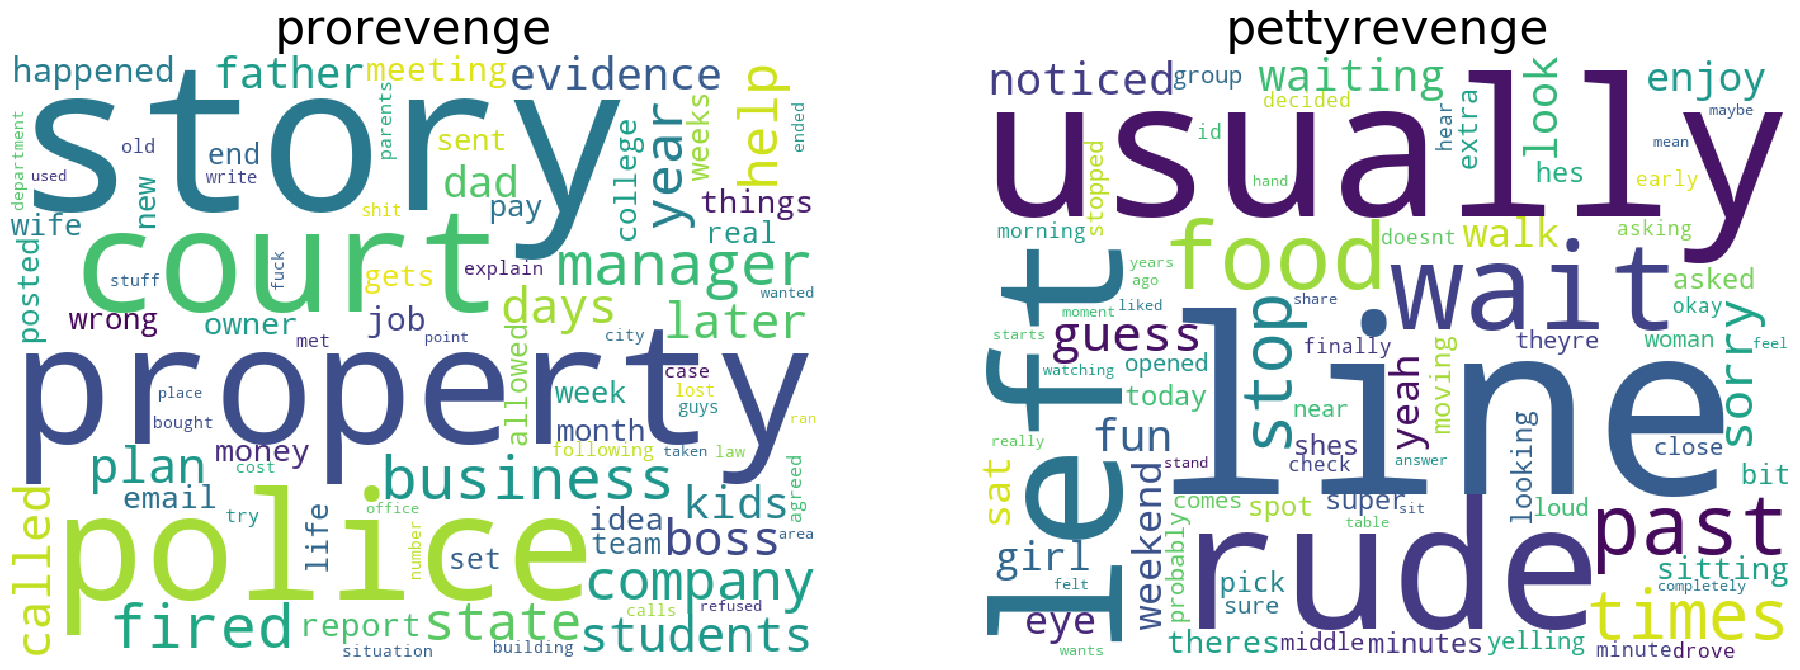

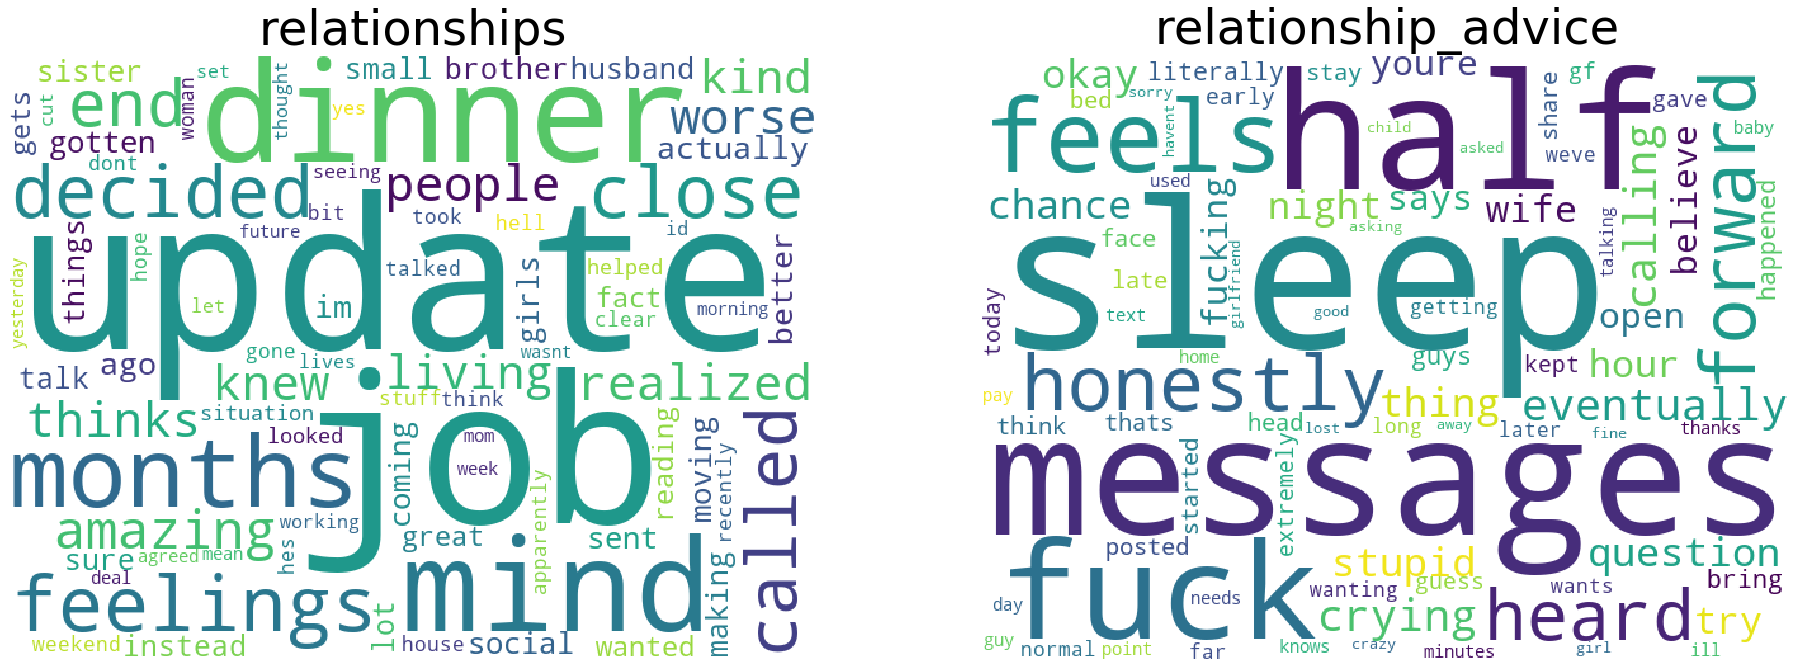

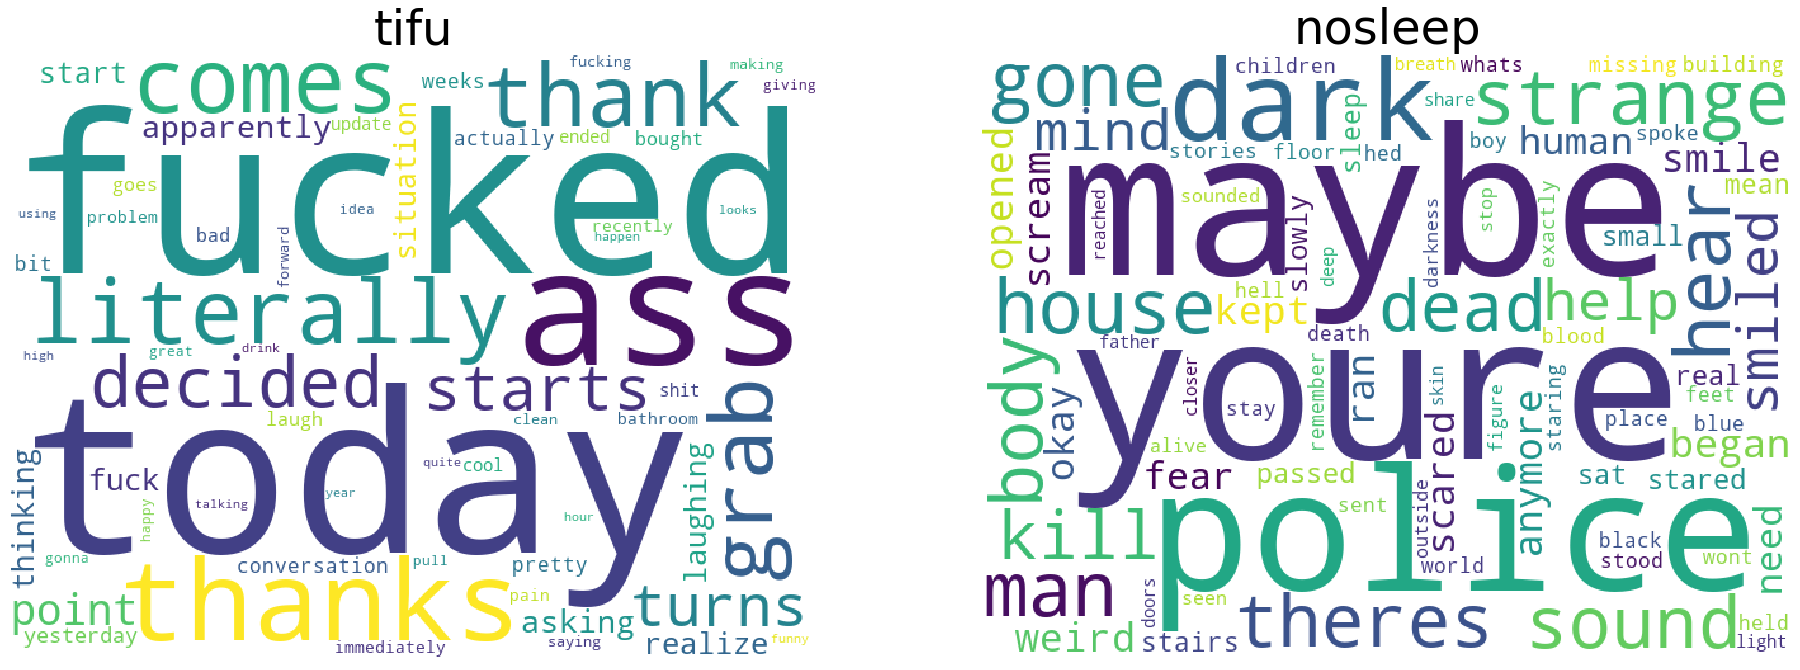

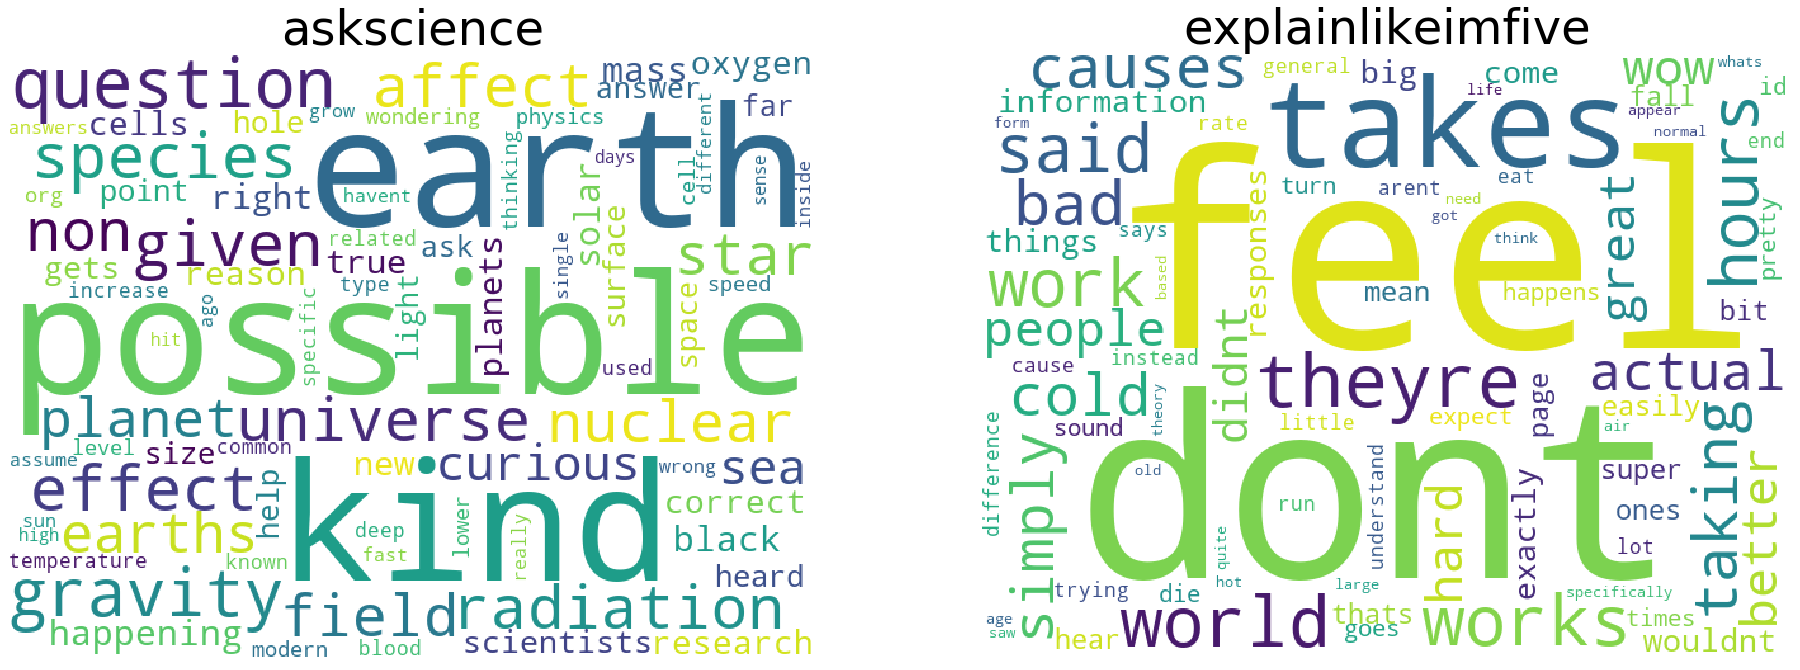

In [17]:
for (feat, s1, s2) in feat_list:
    plot_word_cloud(feat, s1, s2)

### Visualization Results
With these results, we can gain insight into the significant differences between subreddits as assigned by our model. With ProRevenge and pettyrevenge, we can see how the stories contain much more serious words, while pettyrevenge has more emphasis on more mundane situations.

<a id='clustering'></a>
# Clustering

For Problem 3, we are interested in clustering submissions from different subreddits, as well as clustering subreddits based on similarity. Our data consists of the 33 subreddits listed above.

<a id='k-means'></a>
## Clustering via k-means

### Clustering submissions

First, we would like to cluster submissions from different subreddits. We create a TFIDF matrix where each row corresponds to a single submission. Then we treat each row as a point in n-space, and generate six cluster centers.

In [18]:
def cluster_submissions_kmeans(subreddits: list, sub_rank_type: str, posts_per_sub: int, clusters: int)->list:
    '''
    Groups together similar submissions by title and body using TFIDF and Kmeans clustering
    We loosely use the subreddit-of-origin in final analysis. Each point in the feature space is 

    parameters:
        subreddit: List[str] - a list of subreddit names
        sub_rank_type: str - how to rank posts within subreddits: "hot" or "top"
        posts_per_sub: int - the number of posts to get for each sub
        clusters: int - number of groups to clusters the subreddits 
    returns:
    List[List[str]] - a list of subreddit clusters
    '''
    %matplotlib inline

    tfidf = TfidfVectorizer(max_df=0.4, min_df=0.1, stop_words=stop_words, ngram_range=(1,2))
    
    print("getting rows from dataframe...")
    dfall = pd.concat([df_loaded.loc[(df_loaded["subreddit"] == subr)][0:posts_per_sub] for subr in tqdm.tqdm_notebook(subreddits)])
    
    Xdf = dfall["title"] + " " + dfall["body"]
    print(Xdf.head())
    print(Xdf.shape)   
    
    X_tfidf = tfidf.fit_transform(Xdf)
    print(X_tfidf.shape)
    kmeans = KMeans(n_clusters=clusters, random_state=688).fit(X_tfidf)

    modes = stats.mode(kmeans.labels_.reshape((-1,posts_per_sub)), axis=1)[0]
    
    for i in range(len(subreddits)):
        print(subreddits[i], kmeans.labels_[posts_per_sub*i:posts_per_sub*(i+1)], " mode is ", modes[i])
        
    pca = PCA(n_components=2)
    pc = pca.fit_transform(X_tfidf.todense())
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

    acolors = np.repeat(stats.mode(kmeans.labels_.reshape((-1,posts_per_sub)), axis=1)[0].reshape(-1), posts_per_sub)
    ax1.scatter(pc[:,0], pc[:,1], c=acolors) 
    ax1.set_title("submissions by subreddit cluster mode")
    ax1.axis("off")

    ax2.scatter(pc[:,0], pc[:,1], c=kmeans.labels_)
    ax2.set_title("submission k-means clusters")
    ax2.axis("off")
    
    print(pc.shape)

getting rows from dataframe...



submission_id
cdrb78    Complete Updated Matchup Guide for Top Lane Tr...
awtc3j                                                 Lul 
bofmt5             Do you guys find this relatable aswell? 
cjs537    This nice player friended me after a match and...
djxphp                                Gold players be like 
dtype: object
(825,)
(825, 142)
tryndameremains [3 5 5 5 5 5 5 5 1 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5]  mode is  [5]
needafriend [3 5 5 1 0 3 0 0 3 5 0 2 0 3 3 5 3 0 5 5 5 0 0 3 5]  mode is  [0]
financialplanning [5 3 1 5 3 5 5 5 3 5 5 5 5 3 1 5 5 5 5 5 5 5 3 5 5]  mode is  [5]
personalfinance [0 3 3 3 3 5 1 3 0 3 0 3 5 5 3 3 3 0 3 5 3 3 0 2 3]  mode is  [3]
techsupport [3 5 0 4 1 0 3 5 3 5 5 0 5 5 5 3 3 5 5 0 2 2 0 0 4]  mode is  [5]
amitheasshole [3 2 2 3 2 0 2 2 2 2 0 2 0 3 2 0 2 5 2 2 2 2 2 2 0]  mode is  [2]
asianbeautyexchange [0 3 3 1 3 0 3 3 5 5 3 1 4 1 3 4 3 3 4 1 4 4 1 0 0]  mode is  [3]
askscience [3 4 5 5 5 5 5 5 5 5 5 5 5 3 0 5 5 5 0 5 5 5 5 5 5]  mode is  [5]
explai

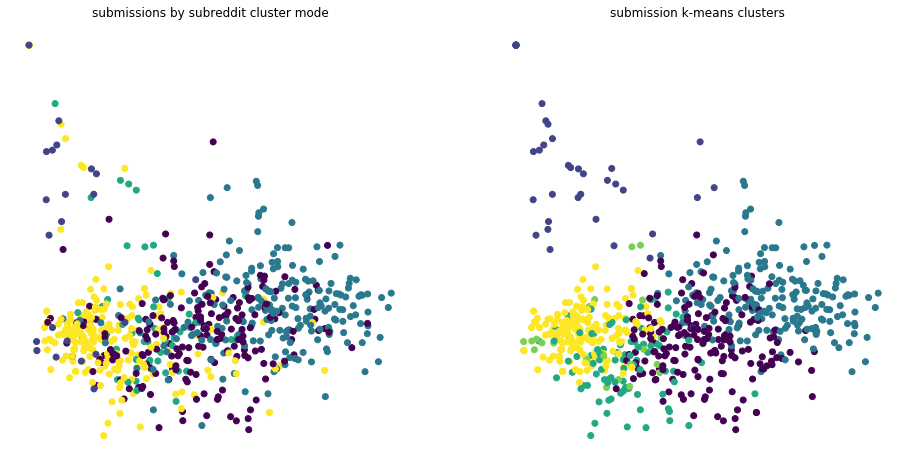

In [19]:
cluster_submissions_kmeans(subreddit_names, "top", 25, 6)
#print(kmeans.cluster_centers_)

First, for each subreddit, we printed to which cluster number each submission belongs. For example,
for the /r/tryndameremains subreddit, `tryndameremains [3 5 5 5 5 5 5 5 1 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5]`, we can see that almost all its submissions were grouped in the 5th cluster.

Then, we perform PCA analysis to choose the two most significant dimensions, so we can easily plot our n-dimensional clusters on a 2D grid you see above. On the left scatterplot, each submission is a point, colored by it's subreddit's mode. For example, /r/tryndameremains has a cluster mode of 5, so we color all submissions from /r/tryndameremains as the 5th cluster. On the right scatterplot, we plot each submission by its raw cluster assignment value. We can see that there are a lot of submissions which were clustered outside its subreddit of origin, but most subreddits have submissions clustered in a way consistent with their own (and possibly other) subreddits.

### Clustering subreddits

To simplify our clustering, we would like to also view entire subreddits as data points, not just individual submissions.
For this task, we concatenate all submissions belonging to the same subreddit, and treat each subreddit as a "super-document". We then generate TFIDF matrix for the subreddits, where each row is a subreddit. We then run K-means clustering again, and view which subreddits were clustered together. Again, we aim for six clusters.

In [20]:
def cluster_subreddits_kmeans(subreddits: list, sub_rank_type: str, posts_per_sub: int, clusters: int)->list:
    '''
    Groups together similar subreddits (not submissions) by title and body using TFIDF and Kmeans clustering.
    Each dot in feature space is one subreddit.

    parameters:
        subreddit: List[str] - a list of subreddit names
        sub_rank_type: str - how to rank posts within subreddits: "hot" or "top"
        posts_per_sub: int - the number of posts to get for each sub
        clusters: int - number of groups to clusters the subreddits 
    returns:
    List[List[str]] - a list of subreddit clusters
    '''
    %matplotlib inline

    tfidf = TfidfVectorizer(max_df=0.4, min_df=0.1, stop_words=stop_words, ngram_range=(1,2))
    
    print("getting rows from dataframe...")
    dfall = pd.concat([df_loaded.loc[(df_loaded["subreddit"] == subr)][0:posts_per_sub] for subr in tqdm.tqdm_notebook(subreddits)])
    
    dfall["combined_body"] = dfall.groupby(["subreddit"])["body"].transform(lambda x: ". ".join(x))
    dfall["combined_title"] = dfall.groupby(["subreddit"])["title"].transform(lambda x: ". ".join(x))
    dfall = dfall[["subreddit", "combined_title", "combined_body"]].drop_duplicates()
    
    Xdf = dfall["combined_title"] + " " + dfall["combined_body"]
    print(Xdf.head())
    print(Xdf.shape)
    
    X_tfidf = tfidf.fit_transform(Xdf)
    print(X_tfidf.shape)
    kmeans = KMeans(n_clusters=clusters, random_state=688).fit(X_tfidf)
    
    for i in range(len(subreddits)):
        print(subreddits[i]," class = ", kmeans.labels_[i])
    
    plot3d = False
    
    if (plot3d) :
        
        pca = PCA(n_components=3)
        pc = pca.fit_transform(X_tfidf.todense())
    
        fig = plt.figure(figsize=(15,15))
        ax = plt.axes(projection='3d')
        ax.scatter3D(pc[:,0], pc[:,1], pc[:,2])
        
        for i, txt in enumerate(subreddits):
            ax.text(pc[i,0], pc[i,1], pc[i,2], txt + "\nc=" + str(kmeans.labels_[i]))
        return
    
    pca = PCA(n_components=2)
    pc = pca.fit_transform(X_tfidf.todense())
    
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(pc[:,0], pc[:,1], c=kmeans.labels_)

    for i, txt in enumerate(subreddits):
        ax.annotate(txt + "\nc=" + str(kmeans.labels_[i]), (pc[i,0], pc[i,1]))
    
    print(pc.shape)

getting rows from dataframe...



submission_id
cdrb78    Complete Updated Matchup Guide for Top Lane Tr...
d2uspt    once i fix my sleep schedule, start eating hea...
c0kfcg    This is why I read r/financialPlanning. 150 ap...
7nhrsp    Warning: AT&T applying "customer loyalty speed...
7ekgjg    This is your last chance to stop ISPs from mes...
dtype: object
(33,)
(33, 3582)
tryndameremains  class =  3
needafriend  class =  2
financialplanning  class =  4
personalfinance  class =  2
techsupport  class =  3
amitheasshole  class =  2
asianbeautyexchange  class =  2
askscience  class =  3
explainlikeimfive  class =  5
cmu  class =  4
crazyhand  class =  3
dating_advice  class =  2
relationships  class =  2
justnomil  class =  2
talesfromtechsupport  class =  1
relationship_advice  class =  2
flute  class =  0
howdidtheycodeit  class =  3
iama  class =  3
talesfromretail  class =  1
karthusmains  class =  0
korean  class =  3
maliciouscompliance  class =  1
pettyrevenge  class =  1
legaladvice  class =  2
idontworkherela

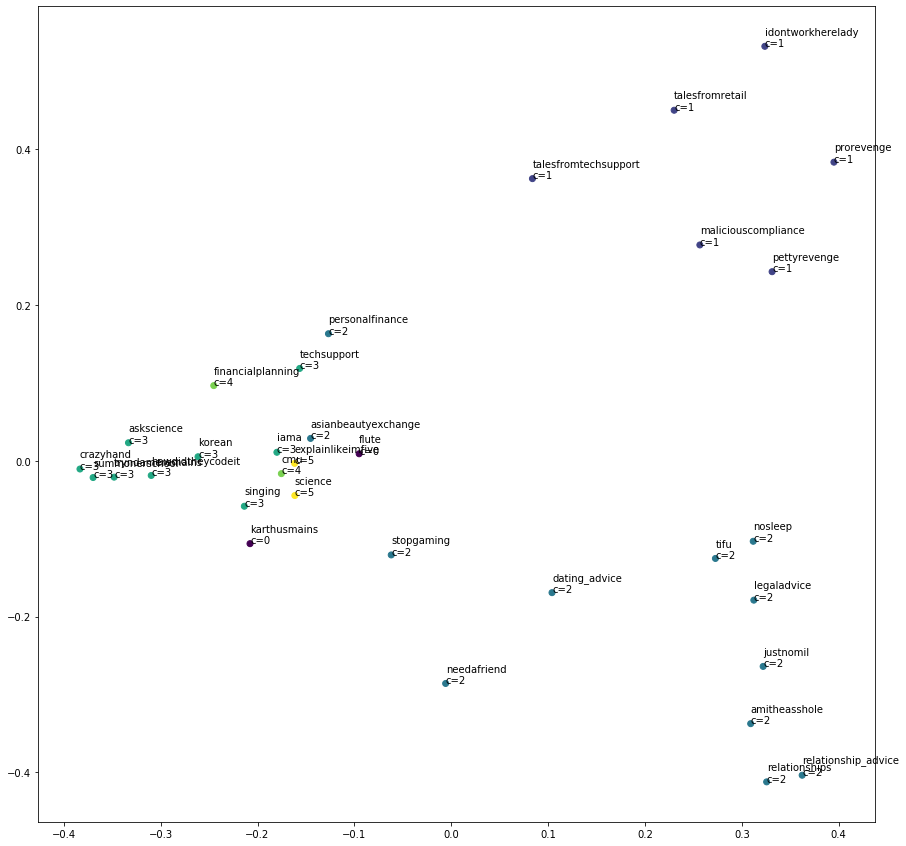

In [21]:
cluster_subreddits_kmeans(subreddit_names, "top", 25, 6)
#print(kmeans.cluster_centers_)

To visualize the data, we again run PCA with two components, and plot the subreddit vectors on a 2D scatterplot. As we can see, most of the story-based subreddits have been clustered into cluster 1 or 2. A lot of the how-to subreddits have also been grouped in cluster 3. However, there are still quite a few extraneous classifications which don't immendiately fit intuition. We will continue to look at another way of clustering subreddits, hierarchical clustering.

<a id='hierarchical'></a>
## Hierarchical clustering

Using our classification model from the Classification section, we aim to get a measure of similarity between all of our distance subreddits. 

Our process is converting test accuracy to a distance/difference measure, which is then the opposite of similarity.

> Gaurav mentioned that in this case, one would usually actually want to use the training accuracy. However, he said we could just settle for test accuracy, as it produced better results. This could be due to the fact that we only have around 2000 submission examples per subreddit, which may not be enough samples.

> Also credit to Gaurav for the 2d matrix idea.

First, we notice that if our classification model fits our problem well, the accuracy should range between 0.50 to 1.0. We thus scale this range to 0.0 to 1.0, and treat that as the distance values.

The following functions compute this distance matrix by comparing every subreddit with every other subreddit through our classification model.

In [22]:
def compare_subreddits(df, sub1, sub2):
    '''
    This function takes two subreddits and fits log regression to their posts.
    It returns test score.
    '''
    df = df[df["subreddit"].isin([sub1,sub2])]
    text_series = df["body"] + " " + df["title"]
    text_series.replace(regex=True,inplace=True,to_replace=r"[’']",value=r'')

    tfidf = TfidfVectorizer(max_df=0.5, min_df = 0.08, stop_words=stop_words, ngram_range=(1,2))
    X_tfidf = tfidf.fit_transform(text_series)
    if X_tfidf.shape[1] > 500:
        print("Too many features, cutting down")
        tfidf = TfidfVectorizer(max_df=0.4, min_df = 0.1, stop_words=stop_words, ngram_range=(1,1))
        X_tfidf = tfidf.fit_transform(text_series)
    elif X_tfidf.shape[1] < 100:
        print("Too little features, loosening restrictions")
        tfidf = TfidfVectorizer(max_df=0.6, min_df = 0.01, stop_words=stop_words, ngram_range=(1,2))
        X_tfidf = tfidf.fit_transform(text_series)
    
    y = df["subreddit"].apply(lambda x: 0 if x == sub1 else 1)
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.25, random_state=0)
    print(f"{X_tfidf.shape[1]} features")
    
    model_log = run_classification("log", X_train, y_train, X_test, y_test)
    return (model_log.score(X_test, y_test), model_log, tfidf)

In [23]:
def weighted_feature_lists(tfidf, model_coefs, list_lim=5):
    '''
    Gets top weighted words after model is fit.
    '''
    feature_names = tfidf.get_feature_names()
    features = sorted(zip(feature_names, model_coefs), key=lambda x: np.abs(x[1]), reverse=True)

    list1 = "\n".join([word + ": " + str(score) for (word, score) in features if score < 0][:list_lim])
    list2 = "\n".join([word + ": " + str(score) for (word, score) in features if score > 0][:list_lim])

    return list1, list2

In [24]:
def generate_distance_matrix():
    '''
    Generates the matrix for all subreddits
    '''
    num_subreddits = len(subreddit_names)
    coefs = np.eye(num_subreddits) * 0.5
    for i in range(num_subreddits):
        for j in range(i+1,num_subreddits):
            print(f"\n-----Comparing {subreddit_names[i]} with {subreddit_names[j]}")
            score, model, tfidf = compare_subreddits(df_loaded, subreddit_names[i], subreddit_names[j])
            list1, list2 = weighted_feature_lists(tfidf, model.coef_[0])
            print(f"---------{subreddit_names[i]}----------")
            print(list1)
            print(f"---------{subreddit_names[j]}----------")
            print(list2)
            coefs[i,j] = score
            coefs[j,i] = sc
    return coefs

In [25]:
def get_distance_matrix():
    '''
    returns distance matrix saved to file, if it exists. 
    Else, generate distance matrix and save to file before returning
    '''
    
    path = "coefs.csv"
    if not os.path.exists(path):
        coefs = generate_distance_matrix()
        np.savetxt(path, coefs, delimiter=",")
    else:
        coefs = np.loadtxt(path, delimiter=",")
    return coefs

def plot_distance_matrix():
    '''plots distance matrix as a heatmap'''
    coefs = get_distance_matrix()

    min_coef = np.min(coefs)
    max_coef = np.max(coefs)

    print(min_coef)

    scaled = (coefs - min_coef) / (max_coef - min_coef)

    print(scaled)
    
    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.imshow(1 - scaled, cmap="hot", interpolation="nearest")
    
    ax.set_xticks(np.arange(len(subreddit_names)))
    ax.set_yticks(np.arange(len(subreddit_names)))
    
    ax.set_xticklabels(subreddit_names)
    ax.set_yticklabels(subreddit_names)
    
    plt.setp(ax.get_xticklabels(), rotation=89, ha="right",
         rotation_mode="anchor")
    
    fig.tight_layout()
    plt.show()
    

### Visualization of distance matrix

The following code produces a figure on the distance matrix. Again, the rows and columns are specific subreddits. Note that lighter color corresponds to higher similarity, and darker color corresponds to difference.

0.5
[[0.         0.91471802 0.91954023 ... 0.80397727 0.95833333 0.99170124]
 [0.91471802 0.         0.92602378 ... 0.92679739 0.9372442  0.9744898 ]
 [0.91954023 0.92602378 0.         ... 0.9373297  0.96581197 0.98937583]
 ...
 [0.80397727 0.92679739 0.9373297  ... 0.         0.96619718 0.99474376]
 [0.95833333 0.9372442  0.96581197 ... 0.96619718 0.         0.9122085 ]
 [0.99170124 0.9744898  0.98937583 ... 0.99474376 0.9122085  0.        ]]


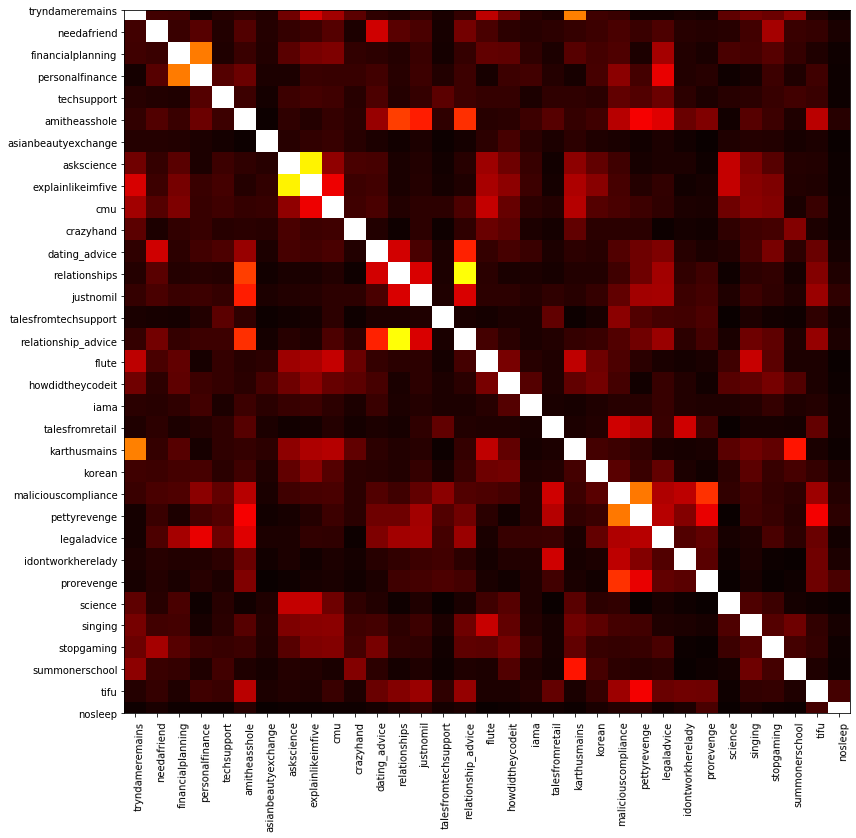

In [26]:
plot_distance_matrix()

Note this is not particularly meaningful at the moment. Let us identify clusters using hierarchical clustering.

We simply pass the distance matrix into the correct scipy clustering functions, and generate a dendrogram. The x-axis consists of the distinct subreddits, while the y-axis represents the distance.

We print out some clusters that were identified, and sort the rows and columns of our distance matrix into the output order of the dendrogram, which reveals clustering.

In [27]:
def hierarchal_clustering():
    '''
    plots a hierarchal cluster based on raw distance matrix,
    and returns new order for distance matrix
    '''
    
    coefs = get_distance_matrix()

    min_coef = np.min(coefs)
    max_coef = np.max(coefs)

    scaled = (coefs - min_coef) / (max_coef - min_coef)
    
    # Turns distance matrix into upper triangular form
    condensed_dist = squareform(scaled)
    
    # Performs the actual clustering
    h_clustering = linkage(condensed_dist, optimal_ordering=True)
    
    # Plots a dendrogram
    ddgrm = dendrogram(h_clustering, labels=subreddit_names, leaf_rotation=90)
    
    #this is the new order
    return [subreddit_names.index(x) for x in ddgrm["ivl"]]

In [28]:
def plot_new_order():
    '''plots the same distance matrix, but with entries re-ordered to show clustering'''
    
    coefs = get_distance_matrix()

    min_coef = np.min(coefs)
    max_coef = np.max(coefs)

    scaled = (coefs - min_coef) / (max_coef - min_coef)
    
    new_order = hierarchal_clustering()
    sorted_subreddit_names = [subreddit_names[i] for i in new_order]
    
    num_subreddits = len(subreddit_names)
    scaled_sorted = np.zeros(shape=(num_subreddits,num_subreddits))
    for i in range(num_subreddits):
        for j in range(i,num_subreddits):
            i1 = new_order[i]
            j1 = new_order[j]
            scaled_sorted[i,j] = scaled[i1,j1]
            scaled_sorted[j,i] = scaled[i1,j1]

            
    # Plot new sorted distance matrix
    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.imshow(1 - scaled_sorted, cmap="hot", interpolation="nearest")
    
    ax.set_xticks(np.arange(len(subreddit_names)))
    ax.set_yticks(np.arange(len(subreddit_names)))
    
    ax.set_xticklabels(sorted_subreddit_names)
    ax.set_yticklabels(sorted_subreddit_names)
    
    plt.setp(ax.get_xticklabels(), rotation=89, ha="right",
         rotation_mode="anchor")
    
    fig.tight_layout()
    plt.show()
    
    for x in [30, 20, 0]:
        print(subreddit_names[x])
    print("")
    for x in [8, 7]:
        print(subreddit_names[x])
    print("")
    for x in [2, 3]:
        print(subreddit_names[x])
    print("")
    for x in [11, 15, 12, 5, 13]:
        print(subreddit_names[x])
    print("")
    for x in [23, 22, 26]:
        print(subreddit_names[x])
    print("")
    for x in new_order:
        print(subreddit_names[x])

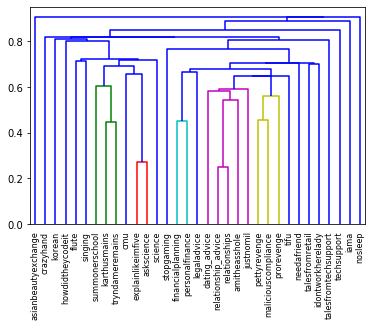

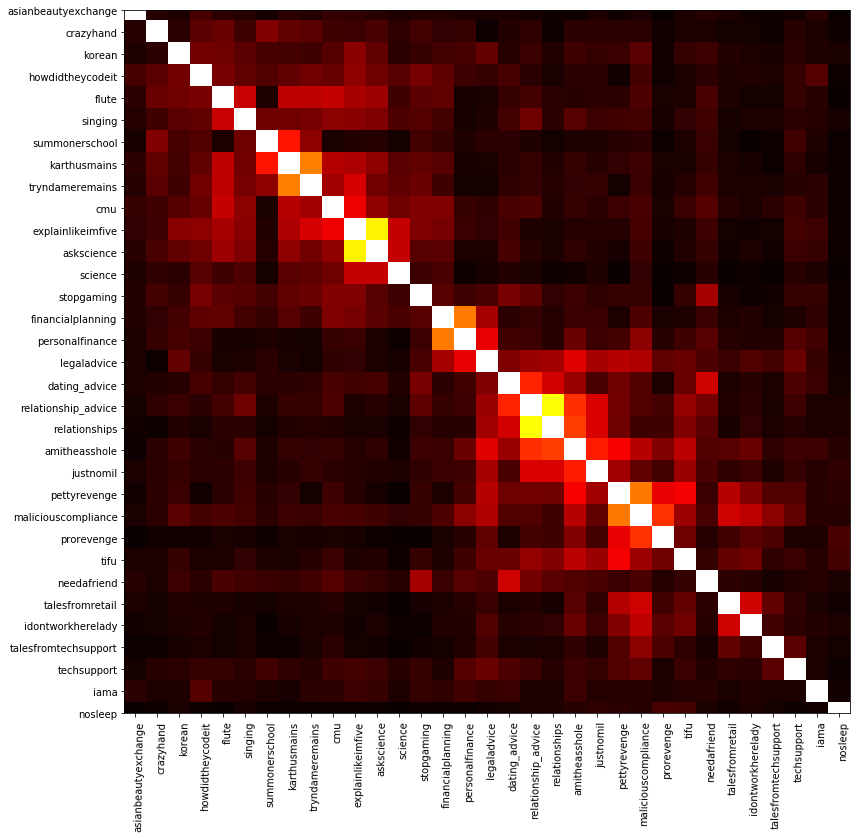

summonerschool
karthusmains
tryndameremains

explainlikeimfive
askscience

financialplanning
personalfinance

dating_advice
relationship_advice
relationships
amitheasshole
justnomil

pettyrevenge
maliciouscompliance
prorevenge

asianbeautyexchange
crazyhand
korean
howdidtheycodeit
flute
singing
summonerschool
karthusmains
tryndameremains
cmu
explainlikeimfive
askscience
science
stopgaming
financialplanning
personalfinance
legaladvice
dating_advice
relationship_advice
relationships
amitheasshole
justnomil
pettyrevenge
maliciouscompliance
prorevenge
tifu
needafriend
talesfromretail
idontworkherelady
talesfromtechsupport
techsupport
iama
nosleep


In [29]:
plot_new_order()

### Clustering results
The clusters identified are consistent with human intuition, which suggests that our classifier accuracy is able to model similarity between subreddits well enough.

Through visualization in the dendrogram, we can also see the individual clusters and the subreddits in those clusters. After sorting the distance matrix, the clusters are also revealed there, which shows much more information than the previous unsorted distance matrix.

<a id='n-gram'></a>
# Text Generation with n-gram (For fun)

Here, for the subreddit /r/tifu, we simply construct an n-gram dictionary based on the top and hot submissions, and then generate text by picking randomly from the probability distributions.

This implementation is based off of homework. I tried to use `nltk`'s generation functions, but I found that it actually produced less coherent results.

In [30]:
from nltk import ngrams
from nltk import word_tokenize
from nltk.text import Text
import re
nltk.download('punkt')
from collections import defaultdict
from random import randrange

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mayank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
def preprocess(text):
    """ Normalizes case and handles punctuation
    
    args:
        text: str -- raw text

    Outputs:
        list(str): tokenized text
    """
    output = text
    output = re.sub("-", " ", output)
    output = re.sub("'", "", output)
    output = re.sub("’", "", output)
    output = re.sub("https", "", output)
    output = re.sub("/r", "", output)
    output = re.sub("&#x200b", "", output)
    output = re.sub("www", "", output)
    output = re.sub("\.com", "", output)
    output = re.sub("imgur", "", output)
    output = re.sub("youtube", "", output)
    output = re.sub("(?![\.,?”“@])[^a-zA-Z0-9\s]", "", output)
    output = re.sub("x200b", "", output)
    output = re.sub("[.a-zA-Z0-9]{15,}", "", output)
    output = nltk.word_tokenize(output)
    output = [x.lower() for x in output]
    
    return output

In [32]:
n = 5


df_sub = df_loaded.loc[df_loaded["subreddit"] == "tifu"]

text_body = df_sub["body"].str.cat(sep=" @ ")

print("Starting tokenization")
words_tokens = preprocess(text_body)
print("Tokenization done")

counts = {}
count_sums = {}

# for i in tqdm.tqdm_notebook(range(len(words_tokens)-words)):
for i in tqdm.tqdm_notebook(range(len(words_tokens) - n + 1)):
    key1 = " ".join(words_tokens[i:n+i-1])
    key2 = words_tokens[n+i-1]
    if key1 not in counts:
        counts[key1] = {}
    if key2 not in counts[key1]:
        counts[key1][key2] = 0
    counts[key1][key2] += 1

    if key1 not in count_sums:
        count_sums[key1] = 0
    count_sums[key1] += 1
    # seq = ' '.join(words_tokens[i:i+words])
    # print(seq)
    # if  seq not in ngrams.keys():
    #     ngrams[seq] = []
    # ngram_dict[seq].append(words_tokens[i+words])

Starting tokenization
Tokenization done


> Time to generate!

In [38]:
curr_sequence = ""
output = curr_sequence
for i in range(200):
    if curr_sequence not in counts:
        curr_sequence = np.random.choice(list(counts.keys()))
    possible_words = counts[curr_sequence]
    count_sum = count_sums[curr_sequence]
    keys = list(possible_words.keys())
    probs = [possible_words[key]/count_sum for key in keys]
    next_word = np.random.choice(keys, p=probs)
    output += ' ' + next_word
    seq_words = nltk.word_tokenize(curr_sequence)
    seq_words.append(next_word)
    curr_sequence = ' '.join(seq_words[1: ])
    if i != 0 and i % 20 == 0:
        output += "\n"
print(output)

 and wasnt upset with me , or her friend , or so i thought . he lives across country but as
 luck would have it he would be visiting his parents in our home town soon for the holiday . we
 made plans to go to the airport anyways and have my girlfriend mail me my wallet later . ok so
 now were all caught up . i put on my music . i hit shuffle play on spotify , and
 all of the beer hit me and our banter became noticeable weird and awkward . i went to go grab
 a trashbag so we can bag it all up and off we went . when we got back to my
 place for a night cap . we drank and smoked a little , then everyone ubered home around 3 am
 . the next day i email them , sending all my informations , and asking for the proposal , and
 started seeing him at his house within that week . i kept prying , asking her more questions , she
 told me there was no payment ever made . i confronted my mom about this and she said “


<a id='conclusion'></a>
# Conclusion
For the first problem, we found that the classification accuracy for Logistic Regression is in line with human ability to classify posts into specific subreddits. We were then able to visualize the specific words that distinguished a subreddit from the other.

For the third problem, we first kmeans-clustered submissions from the subreddits and then clustered entire subreddits as points and viewed the clusters with PCA. While somewhat intuitive, we found there to be many exceptions to the assigned clusters for  submissions and subreddits. We moved on to use hierarchical clustering based on distances calculated using our classification model, and we were able to produce clusters of subreddits that were similar. The hierarchical clusters made mode intuitive sense than the clusters generated by kmeans. This implies that the accuracy for our logistic classification is able to model similarity and differences well.

<a id='future'></a>
## Future Investigation
As an application for classification, we can attempt to not only analyze different subreddits, but also analyze data from a single subreddit over time. For example, we could go through the classification process with /r/news pre-2016 and post-2016, and then see the distinguishing vocabulary.

We can also include comment content in the future. For this project, getting comments for every submission would take too long for the avaliable time we had to work on it, so we cut out analysis including comments.

Finally, we can also do sentiment analysis, such as negative-positive sentiment analysis. An issue with this however, is the inability for libraries such as `nltk`'s vader-lexicon to detect sarcasm, which is abundant in reddit comments.

## References
1. [Classifying Reddit Posts With Natural Language Processing and Machine Learning](https://towardsdatascience.com/classifying-reddit-posts-with-natural-language-processing-and-machine-learning-695f9a576ecb)
2. [Interactive Map of Reddit and Subreddit Similarity Calculator](https://www.shorttails.io/interactive-map-of-reddit-and-subreddit-similarity-calculator/)
6. [PRAW](https://praw.readthedocs.io/en/latest/)
3. [sklearn](https://scikit-learn.org/stable/)
4. [nltk](https://www.nltk.org/)
5. [scipy](https://www.scipy.org/)
